In [1]:
from bs4 import BeautifulSoup
import urllib.request
import urllib.parse
import pandas as pd
import requests
import numpy as np
from tqdm import tqdm_notebook
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
mpl.rc('font', family='NanumGothic')
mpl.rc('axes', unicode_minus=False)

In [2]:
# url = 'https://www.genie.co.kr/chart/top200?ditc=D&ymd=20201119&hh=10&rtm=Y&pg=1'
# with urllib.request.urlopen(url) as res:
#     html = res.read()
#     soup = BeautifulSoup(html,'html.parser')
url = 'https://www.genie.co.kr/chart/top200?ditc=W&ymd=20201109&hh=10&rtm=N&pg=1'
header = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; Trident/7.0; rv:11.0) like Gecko'}
req = requests.get(url, headers = header)
html = req.text
soup = BeautifulSoup(html,'html.parser')

In [3]:
# album = soup.select("tr.list > td.info >a.albumtitle")
# singer = soup.select("tr.list > td.info > a.artist")
# rank = soup.select("tr.list > td.number")
# song_li = soup.select("tr.list > td.check > input[title]")
# song_list = []
# rank_list = []
# diff_list = []
# singer_lsit = []
# album_list = []
# for k in range(len(song_li)):
#     song_list.append(song_li[k]["title"])
#     rank_list.append(' '.join(rank[k].get_text().split("\n")).split()[0])
#     diff_list.append(' '.join(rank[k].get_text().split("\n")).split()[1])
#     album_list.append(album[k].get_text())
#     singer_lsit.append(singer[k].get_text())
# print(len(album_list))
# print(album_list)

In [4]:
# for i in range(6):
#     url = f'https://www.genie.co.kr/chart/top200?ditc=W&ymd=20201109&hh=10&rtm=N&pg={1+i}'
#     header = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; Trident/7.0; rv:11.0) like Gecko'}
#     req = requests.get(url, headers = header)
#     html = req.text
#     soup = BeautifulSoup(html,'html.parser')
    
#     album = soup.select("tr.list > td.info >a.albumtitle")
#     singer = soup.select("tr.list > td.info > a.artist")
#     rank = soup.select("tr.list > td.number")
#     song_li = soup.select("tr.list > td.check > input[title]")
#     if i == 0: 
#         song_list = []
#         rank_list = []
#         diff_list = []
#         singer_lsit = []
#         album_list = []
#     for k in range(len(song_li)):
#         song_list.append(song_li[k]["title"])
#         rank_list.append(' '.join(rank[k].get_text().split("\n")).split()[0])
#         diff_list.append(' '.join(rank[k].get_text().split("\n")).split()[1])
#         singer_lsit.append(singer[k].get_text())
#         album_list.append(album[k].get_text())
# print(len(album_list))
# print(album_list)

## 상세 정보도 같이 크롤링하려 했으나 동적 작업으로 인해 Selenium을 사용해야 한다고 해서 일단 리스트만 받았습니다

### 크롤링하고 데이터베이스 만들기

In [5]:
for i in range(6):
    url = f'https://www.genie.co.kr/chart/top200?ditc=W&ymd=20201109&hh=10&rtm=N&pg={1+i}'
    header = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; Trident/7.0; rv:11.0) like Gecko'}
    req = requests.get(url, headers = header)
    html = req.text
    soup = BeautifulSoup(html,'html.parser')
    
    album = soup.select("tr.list > td.info >a.albumtitle")
    singer = soup.select("tr.list > td.info > a.artist")
    rank = soup.select("tr.list > td.number")
    song_li = soup.select("tr.list > td.check > input[title]")
    if i == 0: 
        song_list = []
        rank_list = []
        diff_num_list = []
        diff_list = []
        singer_lsit = []
        album_list = []
        diff_sum_list = []
    for k in range(len(song_li)):
        song_list.append(song_li[k]["title"])
        if (' '.join(rank[k].get_text().split("\n")).split()[1][-3:] == "new") or (' '.join(rank[k].get_text().split("\n")).split()[1][-3:] == "유지"):
            diff_list.append(' '.join(rank[k].get_text().split("\n")).split()[1])        
            diff_num_list.append(None)        
        else:
            num = ' '.join(rank[k].get_text().split("\n")).split()[1][:-2]
            diff_list.append(' '.join(rank[k].get_text().split("\n")).split()[1][-2:])         
            diff_num_list.append(int(num) if num != '' else 0)
        rank_list.append(' '.join(rank[k].get_text().split("\n")).split()[0])
        singer_lsit.append(singer[k].get_text())
        album_list.append(album[k].get_text())
for k in range(len(diff_list)):
    diff_sum_list.append((str(diff_num_list[k]) + diff_list[k]) if (diff_list[k] != "new") and (diff_list[k] != "유지") else diff_list[k])
print(len(diff_sum_list))
best_250 = pd.DataFrame({
                        'rank':rank_list,
                        'song':song_list,
                        'singer':singer_lsit,
                        'album':album_list,
                        'diff':diff_sum_list,
                        'diff_list':diff_list,
                        'diff_num_list':diff_num_list,
                        },columns=['rank','song','singer','album','diff','diff_num_list','diff_list']).set_index("rank")
diff_num_new_list = []
for i in range(len(diff_num_list)):
    if best_250["diff_list"][i] == '하강':
        diff_num_new_list.append(-1*int(best_250["diff_num_list"][i]))
    else :
        diff_num_new_list.append(best_250["diff_num_list"][i])
best_250["diff_num_list"] = diff_num_new_list
best_250.head(25)

250


,song,singer,album,diff,diff_num_list,diff_list
rank,,,,,,
1,가을밤에 든 생각,잔나비,잔나비 소곡집 l,13상승,13.0,상승
2,잠이 오질 않네요,장범준,잠이 오질 않네요,1하강,-1.0,하강
3,Dynamite,방탄소년단,Dynamite (DayTime Ver.),1하강,-1.0,하강
4,힘든 건 사랑이 아니다,임창정,힘든 건 사랑이 아니다,1하강,-1.0,하강
5,Lovesick Girls,BLACKPINK,THE ALBUM,1하강,-1.0,하강
6,딩가딩가 (Dingga),마마무(Mamamoo),딩가딩가 (Dingga),2상승,2.0,상승
7,DON'T TOUCH ME,환불원정대,DON'T TOUCH ME,2하강,-2.0,하강
8,I CAN'T STOP ME,TWICE (트와이스),Eyes wide open,1상승,1.0,상승
9,너도 아는,폴킴,너도 아는,2하강,-2.0,하강


### 칼라코드 넣기

In [6]:
# best_250[:25][best_250['diff_list']!="new"].plot.bar(x="singer",y='diff_num_list')
colors=[]
for i in best_250["diff_list"]:
    if i == "상승":
        colors.append('r')
    elif i == "하강":
        colors.append('b')
    else :
        colors.append('w')
best_250['color_code'] = colors
# best_250[:25][best_250['diff_list']!="new"]
# best_250[:25][(best_250['diff_list']!="new") & (best_250['diff_list']=="상승")]

In [7]:
best_250.head(25)

,song,singer,album,diff,diff_num_list,diff_list,color_code
rank,,,,,,,
1,가을밤에 든 생각,잔나비,잔나비 소곡집 l,13상승,13.0,상승,r
2,잠이 오질 않네요,장범준,잠이 오질 않네요,1하강,-1.0,하강,b
3,Dynamite,방탄소년단,Dynamite (DayTime Ver.),1하강,-1.0,하강,b
4,힘든 건 사랑이 아니다,임창정,힘든 건 사랑이 아니다,1하강,-1.0,하강,b
5,Lovesick Girls,BLACKPINK,THE ALBUM,1하강,-1.0,하강,b
6,딩가딩가 (Dingga),마마무(Mamamoo),딩가딩가 (Dingga),2상승,2.0,상승,r
7,DON'T TOUCH ME,환불원정대,DON'T TOUCH ME,2하강,-2.0,하강,b
8,I CAN'T STOP ME,TWICE (트와이스),Eyes wide open,1상승,1.0,상승,r
9,너도 아는,폴킴,너도 아는,2하강,-2.0,하강,b


In [8]:
best_250.sort_values("diff_num_list",ascending=False)

,song,singer,album,diff,diff_num_list,diff_list,color_code
rank,,,,,,,
128,그 밤 그 밤,잔나비,잔나비 소곡집 l,51상승,51.0,상승,r
149,한걸음,잔나비,잔나비 소곡집 l,37상승,37.0,상승,r
100,너의 번호를 누르고 (Prod. by 영화처럼),#안녕,너의 번호를 누르고,21상승,21.0,상승,r
199,내 생에 아름다운,케이윌 (K.Will),뷰티 인사이드 OST Part.4 (JTBC 월화드라마),16상승,16.0,상승,r
53,주저하는 연인들을 위해,잔나비,전설,16상승,16.0,상승,r
...,...,...,...,...,...,...,...
243,Therefore I Am,Billie Eilish,Therefore I Am,new,NaN,new,w
245,너의 하루 (바른연애 길잡이 X 로꼬),로꼬,너의 하루 (바른연애 길잡이 X 로꼬),new,NaN,new,w
246,Mood (Feat. Iann Dior),24KGoldn,Mood,new,NaN,new,w


### 너무 많아서 변동폭이 있는 몇개만 추려서 그래프로 했습니다

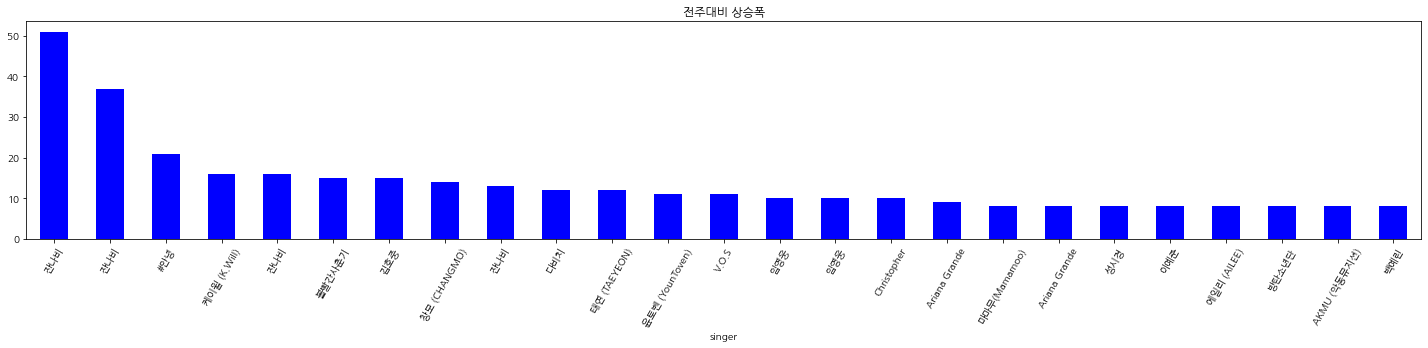

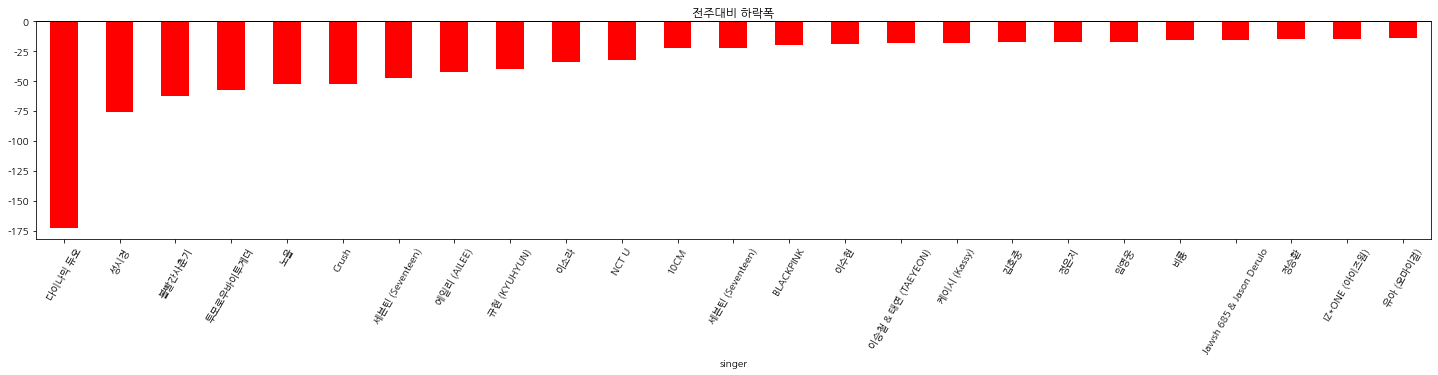

In [9]:
plt.rcParams["figure.figsize"] = (25,4)
not_new = best_250['diff_list']!="new"
not_maintain = best_250['diff_list']!="유지"
# qur3 = int(len(best_250[not_new])/3)
best_250.sort_values("diff_num_list",ascending=False)[not_new & not_maintain][:25].plot.bar(x="singer",y='diff_num_list',legend = None,color="b",title="전주대비 상승폭")
plt.xticks(rotation=60)
best_250.sort_values("diff_num_list")[not_new & not_maintain][:25].plot.bar(x="singer",y='diff_num_list',color='red',legend = None,title="전주대비 하락폭")
plt.xticks(rotation=60)
plt.axhline(y=0,color='black',linewidth=1)
# plt.title("전주대비 순위변화")
plt.show()


# 여기부터는 미완성입니다

In [10]:
from selenium import webdriver

In [11]:
driver = webdriver.Chrome('C:/Users/shoseo/Downloads/chromedriver')
driver.get('https://www.genie.co.kr/chart/top200?ditc=W&ymd=20201109&hh=10&rtm=N&pg=1')
list = driver.find_elements_by_class_name("btn.artist-etc")
for i in range(len(list)):
    list[i].send_keys('\n')
html = driver.page_source
soup = BeautifulSoup(html,'html.parser')
driver.close()


In [18]:
art_li = soup.select("ul.list")
art_li[0]

<ul class="list" id="RelationArtist_91290290"><dt>작사</dt><dd><a href="#" id="relation-list_91290290" onclick="fnViewArtist('80539415'); return false;">최정훈 (잔나비)</a></dd><dt>편곡</dt><dd><a href="#" id="relation-list_91290290" onclick="fnViewArtist('80539415'); return false;">최정훈 (잔나비)</a><a href="#" id="relation-list_91290290" onclick="fnViewArtist('80539419'); return false;">김도형</a></dd><dt>메인</dt><dd><a href="#" id="relation-list_91290290" onclick="fnViewArtist('80267246'); return false;">잔나비</a></dd><dt>작곡</dt><dd><a href="#" id="relation-list_91290290" onclick="fnViewArtist('80539415'); return false;">최정훈 (잔나비)</a><a href="#" id="relation-list_91290290" onclick="fnViewArtist('80539419'); return false;">김도형</a></dd></ul>

In [15]:
art_li = soup.select("ul.list > dd")
# art_li[0].find_all("a")[-1].get_text()
art_lis = soup.select("ul.list")
art_li[0].find_all("a")[-1].get_text()
art_lis[4].get_text().split("작사")[1].split("메인")


['David StewartJessica Agombar', '방탄소년단작곡David StewartJessica Agombar']

In [948]:
art_li = soup.select("ul.list > dd")
Lyricist = []
Arranger = []
composer = []

for i in range(len(art_li)):
    ex_li1 = []
    ex_li2 = []
    ex_li3 = []
    ex_li4 = []
    for k in range(len(art_li[i].find_all("a"))):
        ex_li1.append(art_li[i].find_all("a")[k].get_text())
    a = ' '.join(ex_li1)
    if i % 4 == 0:
        Lyricist.append(a)
    elif i % 4 == 1:
        Arranger.append(a)
    # elif i % 4 == 2:
    #     ex_li1.append(a)
    elif i % 4 == 3:
        composer.append(a)
print(Arranger)
    # print(art_li[2+4*i].get_text())
    # print(art_li[3+4*i].get_text())
# art_li[1].find_all("a")[0].get_text()
# art_li[1].get_text()
# art_li[2] = 메인
# art_li[3] = 작곡

['최정훈 (잔나비) 김도형', '장범준 전영호 황인현 이규형', '방탄소년단', '임창정', 'BLACKPINK', '마마무(Mamamoo)', '환불원정대', 'TWICE (트와이스)', '폴킴', '산들', '볼빨간사춘기', '마마무(Mamamoo)', "FRANTS 'Hitman' Bang Kyler Niko Paulina Cerrilla 은하 (여자친구) 조윤경 유주 (여자친구) Alice Vicious Cazzi Opeia Ellen Berg Tollbom JADED JANE Noisy Citizen Justin Reinstein JJean 엄지 (여자친구)", 'Egg1 Egg2 Egg3', '이기환', '로코베리 Pinkpage', '장범준', '박진영', '태민 (TAEMIN)', '임영웅', 'SUGA EL CAPITXN 아이유 (IU)', '유건형 전병일 강필성', '강욱진 Diggy MINO (송민호)', '창모 (CHANGMO) Panda Gomm Catchup (케첩)', '박우상 (RBW)', 'R.Tee 24', '멧돼지 김시온', 'Crush 김맨디', '서정아', 'Egg1 Egg2 Egg3', 'DOKO (도코) 사승호', '이종훈 이채규', '창모 (CHANGMO)', '이상훈', '어깨깡패', '이현영', '로꼬 헤이즈 (Heize)', '미후왕', '한상원 이진성 (먼데이 키즈/Monday Kiz)', 'Halsey', '안신애', '오반', '이라온', '마크툽 (Maktub)', '이선화']


In [820]:

    for k in range(len(art_li[0+4*i].find_all("a"))):
        ex_li1.append(art_li[0+4*i].find_all("a")[k].get_text())
    Lyricist.append(' '.join(ex_li1))